In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.455,0.365,1
1,0.350,0.265,0
2,0.530,0.420,0
3,0.440,0.365,1
4,0.330,0.255,1


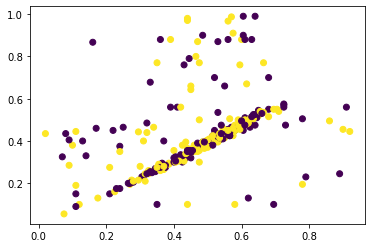

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2023-04-05 14:06:59.268302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


2023-04-05 14:07:34.445289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.get_weights()

[array([[ 0.33967346, -0.15656507, -0.19613004,  0.5979046 , -0.07999808,
          0.29740387, -0.10093528,  0.0573256 ,  0.2239756 ,  0.38931257],
        [ 0.49266356, -0.3105513 ,  0.34892756, -0.20988253,  0.69209427,
          0.43415338,  0.64992815,  0.52421135,  0.6125222 ,  0.5665191 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.17426947, -0.5387495 , -0.35975242, -0.5238618 ,  0.38522494,
         -0.03902978,  0.3675254 ,  0.3871482 ,  0.3430869 , -0.41114557],
        [-0.3114678 , -0.18108141, -0.41991854,  0.2174139 , -0.22682676,
          0.02229071,  0.00267428,  0.44936037,  0.29199696, -0.41165304],
        [-0.37024865, -0.14141098,  0.07766873, -0.24591902,  0.27169   ,
          0.43351763,  0.05877495,  0.5427228 , -0.31900948,  0.38889337],
        [-0.01384395,  0.41137278, -0.495703  ,  0.49871564,  0.2583738 ,
          0.19245648, -0.27844843,  0.5390587 ,  0.12427127, -0.17333275],
        [ 0.07540

In [9]:
initial_weights = model.get_weights()

# Initialization of weights according to Xavier

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

# wieghts before Training

In [12]:
model.get_weights()

[array([[-2.1187499 ,  0.35897776,  0.13677388, -0.28915355,  0.6974213 ,
          0.35033962,  0.6943383 , -0.2877666 ,  1.2778739 ,  0.15585491],
        [-0.09081965, -0.4293246 , -0.895287  , -1.1555737 , -0.6686691 ,
         -0.97372556, -0.32661542, -0.1675525 ,  0.07607233,  1.4272399 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.03340156, -0.34173766, -0.03085214, -0.13495006,  0.42004174,
         -0.00718797,  0.1324912 , -0.39698452, -0.30748075,  0.15006323],
        [-0.25711143, -0.23452482,  0.42454335, -0.0258646 ,  0.04296152,
         -0.23648235, -0.44166166,  0.04641585,  0.59612805,  0.08779025],
        [ 0.08178271,  0.04798024, -0.29575017, -0.19783004, -0.19695906,
         -0.10003392,  0.16407576, -0.28707796, -0.47134656,  0.3353875 ],
        [-0.09463985,  0.3252943 ,  0.38229248, -0.01900019, -0.09504994,
          0.33128408, -0.17579307,  0.63143826, -0.00909944,  0.05795936],
        [-0.10606

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.7019 - accuracy: 0.4958 - val_loss: 0.7002 - val_accuracy: 0.4590
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.4590
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.4958 - val_loss: 0.6944 - val_accuracy: 0.4426
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5167 - val_loss: 0.6931 - val_accuracy: 0.5574
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6930 - val_accuracy: 0.5410
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6934 - val_accuracy: 0.5410
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5042 - val_loss: 0.6941 - val_accuracy: 0.5082
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5250 - val_loss: 0.7014 - val_accuracy: 0.4262
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5042 - val_loss: 0.7006 - val_accuracy: 0.3770
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.4958 - val_loss: 0.6998 - val_accuracy: 0.4426
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5042 - val_loss: 0.7000 - val_accuracy: 0.4426
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5125 - val_loss: 0.7003 - val_accuracy: 0.4262
Epoch 64/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.7009 - val_accuracy: 0.3934
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.7007 - val_accuracy: 0.4262
Epoch 66/100
8/8 [===============

# weights after training

In [15]:
model.get_weights()

[array([[-2.1616    ,  0.39448145,  0.12237459, -0.28533217,  0.6717617 ,
          0.31962237,  0.7215943 , -0.31680673,  1.2847347 ,  0.15099531],
        [-0.088533  , -0.3928858 , -0.9138044 , -1.1436721 , -0.6962499 ,
         -1.0040327 , -0.2951154 , -0.18879181,  0.06692953,  1.3781183 ]],
       dtype=float32),
 array([-0.05241564, -0.0088755 ,  0.03338685,  0.05800696,  0.02864056,
         0.02373787, -0.02284238,  0.02674931,  0.03666473, -0.01492465],
       dtype=float32),
 array([[ 0.00154792, -0.34311545, -0.03495954, -0.13927956,  0.41296273,
         -0.00834834,  0.14746739, -0.39131498, -0.29468444,  0.14118564],
        [-0.25168696, -0.24670084,  0.40674368, -0.01034031,  0.02067468,
         -0.23251382, -0.43741766,  0.04495288,  0.6146823 ,  0.07503562],
        [ 0.13611841,  0.0269347 , -0.3260898 , -0.22345056, -0.2340535 ,
         -0.07558345,  0.20301075, -0.25761518, -0.42970523,  0.34341145],
        [-0.04482301,  0.30953076,  0.35904413, -0.03976491, 

# clearly the weights are changing it means the training happens.

3888/3888 [==============================] - 3s 825us/step


<AxesSubplot:>

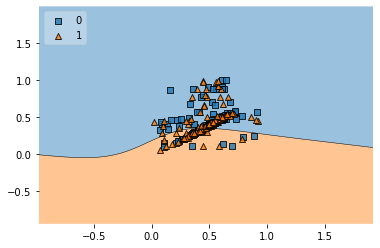

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [28]:
(np.random.randn(10,10)*0.01).min()

-0.026458826007073322

In [29]:
(np.random.randn(10,10)*0.01).max()

0.017813267349627612